In [22]:
import numpy as np
import math

# Define time series function
def f(t):
    noise = np.random.normal(0,1,1)
    f_1 = math.sin(t) + 0.001*noise[0]
    f_2 = 2*(t-math.floor(t)) + 0.002*noise[0]
    f_3 = 0.01*t + 0.001*noise[0]
    return np.asarray([f_1,f_2,f_3])

In [23]:
# Generate random 3x3 matrix
A = np.random.rand(3,3)

In [30]:
# Generate dataset
X = np.empty([0,3])
X_transformed = np.empty([0,3])

n_samples = 5000
time = np.linspace(0, 20, n_samples)

for i in time:
    X = np.vstack([X,f(i)])
    X_transformed = np.vstack([X_transformed, np.matmul(A,f(i))])
# Standardize
X /= X.std(axis=0)

In [31]:
# Apply PCA to transformed data
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_transformed)

In [32]:
# Apply ICA
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_reconstructed = ica.fit_transform(X_transformed)
A_estimated = ica.mixing_

/home/panopticon/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [33]:
# Check correctness by reverting reconstruction
# (see https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)
assert np.allclose(X_transformed, np.dot(X_reconstructed, A_estimated.T) + ica.mean_)

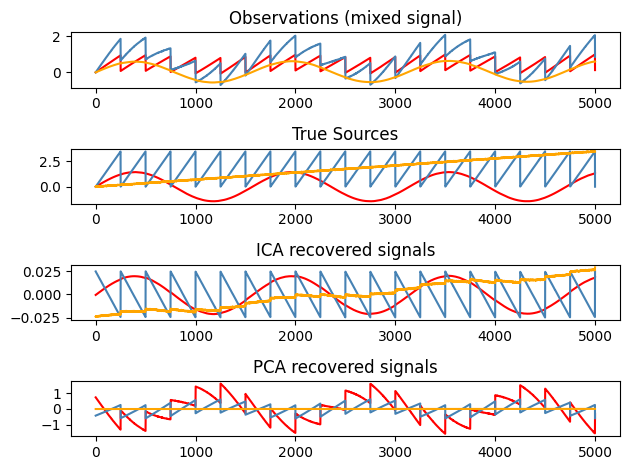

In [34]:
# code from https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

import matplotlib.pyplot as plt

plt.figure()

models = [X_transformed, X, X_reconstructed, X_pca]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()